## I confirm that this is my own work, except where clearly indicated.

### Importing packages 

In [349]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import math
import seaborn as sns

### Reading the data in, and splitting into training and testing sets

In [350]:
input_data = pd.read_csv("train.csv")

In [351]:
input_data

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


In [352]:
# Drop ID 
input_data = input_data.drop("id", axis=1)

In [353]:
input_data["target"].unique()

array([0, 1])

In [354]:
Y = input_data["target"]
X = input_data.iloc[:,1:]

In [355]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, stratify=Y, test_size=0.30, random_state=42)

In [356]:
del X, Y

In [357]:
X_Train.describe()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,...,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000
mean,1.900295,1.358888,4.421207,0.417319,0.406293,0.392898,0.257227,0.164206,0.185670,0.000391,...,5.440413,1.440869,2.873142,7.537458,0.121973,0.628420,0.554055,0.287178,0.349043,0.153153
std,1.984169,0.664198,2.698962,0.493380,1.352404,0.488395,0.437106,0.370463,0.388841,0.019775,...,2.330926,1.201221,1.695121,2.748044,0.327256,0.483228,0.497070,0.452446,0.476668,0.360136
min,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [358]:
list_of_missing = []
for col in X_Train.columns:
    if "cat" in col:
        X_Train[col] = pd.Categorical(X_Train[col])
        
    total = X_Train[X_Train[col] == -1].count()
    if total[0] > 0: 
        list_of_missing.append((col, total[0]/len(X_Train)))

In [359]:
list_of_missing.sort(key = lambda x: x[1]) 
list_of_missing

[('ps_car_11', 7.200322574451335e-06),
 ('ps_car_02_cat', 9.600430099268447e-06),
 ('ps_ind_04_cat', 0.00012960580634012404),
 ('ps_car_01_cat', 0.00017520784931164917),
 ('ps_ind_02_cat', 0.00033841516099921277),
 ('ps_car_09_cat', 0.0009744436550757474),
 ('ps_ind_05_cat', 0.00963163149709107),
 ('ps_car_07_cat', 0.0192296614888347),
 ('ps_car_14', 0.07168161133618786),
 ('ps_reg_03', 0.18111691403774888),
 ('ps_car_05_cat', 0.4475432499375972),
 ('ps_car_03_cat', 0.6908949520938538)]

In [360]:
# remove 3 highest columns, replace the rest with the mean for non categorical data 
# and the mode for categorical data 
X_Train = X_Train.drop(["ps_car_03_cat","ps_car_05_cat", "ps_reg_03"], axis=1)

In [361]:
X_Test = X_Test.drop(["ps_car_03_cat","ps_car_05_cat", "ps_reg_03"], axis=1)

In [362]:
imputer_list = {}

In [363]:
from sklearn.impute import SimpleImputer

In [364]:
for i in list_of_missing[0:-3]:
    name = i[0]
    if "cat" in name:
        imp = SimpleImputer(missing_values=-1, strategy='median')
    else:
        imp = SimpleImputer(missing_values=-1, strategy='mean')
        
    X_Train[name] = imp.fit_transform(X_Train[[name]])
    X_Test[name]  = imp.transform(X_Test[[name]])
    imputer_list[name] = imp

In [365]:
mask = np.column_stack([X_Train[col] == -1 for col in X_Train])
X_Train.loc[mask.any(axis=1)]

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin


In [366]:
X_Train.dtypes

ps_ind_01            int64
ps_ind_02_cat      float64
ps_ind_03            int64
ps_ind_04_cat      float64
ps_ind_05_cat      float64
ps_ind_06_bin        int64
ps_ind_07_bin        int64
ps_ind_08_bin        int64
ps_ind_09_bin        int64
ps_ind_10_bin        int64
ps_ind_11_bin        int64
ps_ind_12_bin        int64
ps_ind_13_bin        int64
ps_ind_14            int64
ps_ind_15            int64
ps_ind_16_bin        int64
ps_ind_17_bin        int64
ps_ind_18_bin        int64
ps_reg_01          float64
ps_reg_02          float64
ps_car_01_cat      float64
ps_car_02_cat      float64
ps_car_04_cat     category
ps_car_06_cat     category
ps_car_07_cat      float64
ps_car_08_cat     category
ps_car_09_cat      float64
ps_car_10_cat     category
ps_car_11_cat     category
ps_car_11          float64
ps_car_12          float64
ps_car_13          float64
ps_car_14          float64
ps_car_15          float64
ps_calc_01         float64
ps_calc_02         float64
ps_calc_03         float64
p

## Perform Further Feature Selection

#### Using Extra Trees

In [367]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [368]:
clf = ExtraTreesClassifier(n_estimators=50)

In [369]:
clf = clf.fit(X_Train, Y_Train)

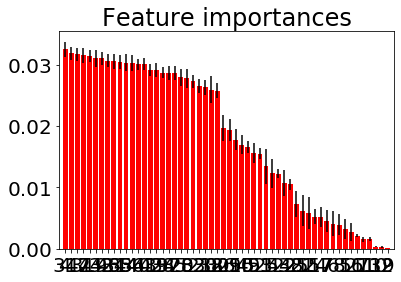

In [370]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_Train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_Train.shape[1]), indices)
plt.xlim([-1, X_Train.shape[1]])
plt.show()

In [371]:
np.mean(importances)

0.018518518518518517

In [372]:
model = SelectFromModel(clf, prefit=True)

In [373]:
# this will return boolean mask for the columns
column_indices = model.get_support(indices=False)    
X_new = X_Train.loc[:, column_indices]                      
# the sliced dataframe, keeping selected columns
col_names = X_new.columns   
col_names

Index(['ps_ind_01', 'ps_ind_03', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02',
       'ps_car_01_cat', 'ps_car_06_cat', 'ps_car_09_cat', 'ps_car_11_cat',
       'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15',
       'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05',
       'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10',
       'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14'],
      dtype='object')

In [374]:
X_Train_Shaped = model.transform(X_Train)
X_Train_Shaped.shape    

(416648, 28)

In [375]:
X_Train_Shaped

array([[1, 7, 7, ..., 3, 3, 7],
       [5, 3, 7, ..., 3, 3, 7],
       [3, 7, 11, ..., 4, 2, 7],
       ...,
       [1, 2, 8, ..., 0, 0, 6],
       [3, 3, 7, ..., 0, 2, 9],
       [2, 7, 6, ..., 0, 2, 14]], dtype=object)

In [376]:
X_Test_Shaped = model.transform(X_Test)

In [377]:
X_Train_Shaped = pd.DataFrame(X_Train_Shaped)
X_Test_Shaped = pd.DataFrame(X_Test_Shaped)

In [378]:
X_Test_Shaped.columns = col_names
X_Train_Shaped.columns = col_names

In [379]:
list_of_cols = [x for x in X_Train_Shaped.columns if "cat" in x]

In [380]:
import scipy.stats as st

In [381]:
spearman_corr = []
for col in X_Train_Shaped.columns:
    spearman_corr.append((col, st.spearmanr(X_Train_Shaped[col], Y_Train)[1]))                       

Text(0, 0.5, 'Correlation')

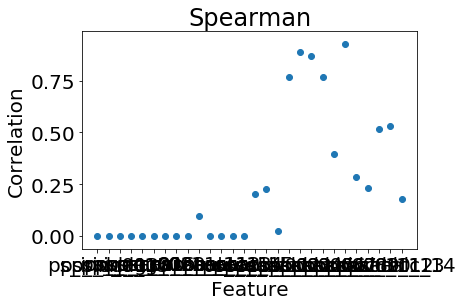

In [382]:
plt.scatter(X_Train_Shaped.columns, [x[1] for x in spearman_corr])
plt.title("Spearman")
plt.xlabel("Feature")
plt.ylabel("Correlation")

This suggests to remove all calculated fields effectively

In [383]:
list_to_remove = []
for i in filter(lambda x: x[1] >=0.05,spearman_corr):
    list_to_remove.append(i[0])

In [384]:
list_to_remove

['ps_car_11',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14']

In [385]:
X_Train_Shaped = X_Train_Shaped.drop(list_to_remove, axis=1)

In [386]:
X_Train_Shaped

,ps_ind_01,ps_ind_03,ps_ind_15,ps_reg_01,ps_reg_02,ps_car_01_cat,ps_car_06_cat,ps_car_09_cat,ps_car_11_cat,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_03
0,1,7,7,0.9,0.3,11,9,2,104,0.4,0.970058,0.374672,3.74166,0.2
1,5,3,7,0.7,0.2,7,11,2,104,0.447214,0.805033,0.424617,3,0.9
2,3,7,11,0.2,0.3,11,6,0,27,0.374166,0.784443,0.390768,3.31662,0.3
3,2,5,11,0.6,0.2,11,0,2,37,0.316228,0.757518,0.3755,3.31662,0
4,5,5,6,0.9,0.3,7,1,2,104,0.43589,0.830289,0.414126,3.16228,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416643,1,3,8,0.5,0.2,7,0,2,87,0.316228,0.720637,0.294449,3.4641,0.5
416644,2,7,5,0.3,0.1,11,15,2,41,0.547723,1.38223,0.532917,3,0.7
416645,1,2,8,0.4,0,6,1,0,74,0.374166,0.777193,0.371618,3.4641,0.5
416646,3,3,7,0.3,0,0,1,0,90,0.374166,0.740533,0.416653,3.16228,0.1


In [387]:
X_Test_Shaped = X_Test_Shaped.drop(list_to_remove, axis=1)

In [388]:
X_Train_Shaped.dtypes

ps_ind_01        object
ps_ind_03        object
ps_ind_15        object
ps_reg_01        object
ps_reg_02        object
ps_car_01_cat    object
ps_car_06_cat    object
ps_car_09_cat    object
ps_car_11_cat    object
ps_car_12        object
ps_car_13        object
ps_car_14        object
ps_car_15        object
ps_calc_03       object
dtype: object

In [389]:
for col in X_Train_Shaped.columns:
    if "cat" in col:
        X_Train_Shaped[col] = pd.Categorical(X_Train_Shaped[col])
    elif "ind" in col:
        X_Train_Shaped[col] = X_Train_Shaped[col].astype("int64")
    else:
        X_Train_Shaped[col] = X_Train_Shaped[col].astype("float64")

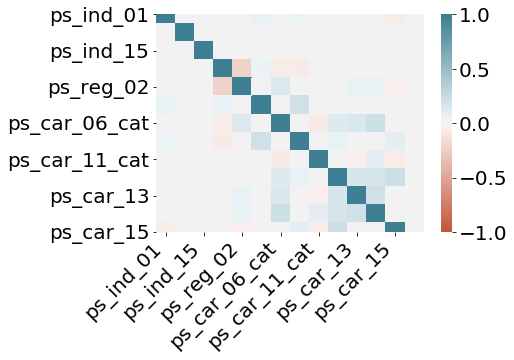

In [390]:
corr = X_Train_Shaped.apply(lambda x : pd.factorize(x)[0]).corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [391]:
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,ps_ind_01,ps_ind_03,ps_ind_15,ps_reg_01,ps_reg_02,ps_car_01_cat,ps_car_06_cat,ps_car_09_cat,ps_car_11_cat,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_03
ps_ind_01,1,-0.0038,0.0039,-0.0025,0.018,0.072,0.017,0.062,0.016,0.019,0.02,0.03,-0.057,-0.0024
ps_ind_03,-0.0038,1,-0.03,0.0076,0.029,-0.005,-0.019,-0.016,-0.017,-0.0094,-0.026,-0.032,0.016,0.0007
ps_ind_15,0.0039,-0.03,1,0.0053,-0.019,0.0074,-0.0025,0.022,-0.0016,0.013,-2.3e-05,-0.0013,0.025,0.0012
ps_reg_01,-0.0025,0.0076,0.0053,1,-0.22,0.063,-0.052,-0.065,-0.011,-0.0085,-0.0036,-0.02,-0.0089,0.0021
ps_reg_02,0.018,0.029,-0.019,-0.22,1,-0.012,0.15,0.0045,-0.0027,0.025,0.077,0.074,-0.042,0.0016
ps_car_01_cat,0.072,-0.005,0.0074,0.063,-0.012,1,0.0031,0.21,-0.012,0.024,0.0093,0.0022,0.0087,0.00048
ps_car_06_cat,0.017,-0.019,-0.0025,-0.052,0.15,0.0031,1,0.01,-0.068,0.13,0.15,0.22,-0.025,0.00032
ps_car_09_cat,0.062,-0.016,0.022,-0.065,0.0045,0.21,0.01,1,-0.013,0.075,0.022,0.015,0.095,-0.00056
ps_car_11_cat,0.016,-0.017,-0.0016,-0.011,-0.0027,-0.012,-0.068,-0.013,1,-0.026,-0.043,0.094,-0.06,0.0029
ps_car_12,0.019,-0.0094,0.013,-0.0085,0.025,0.024,0.13,0.075,-0.026,1,0.16,0.17,0.23,-0.00035


## One Hot Encoding

In [392]:
submission_test_columns = X_Train_Shaped.columns

In [393]:
X_Train_Shaped.shape

(416648, 14)

In [398]:
[(i, X_Train_Shaped[i].unique()) for i in X_Train_Shaped.columns if "cat" in i]

[('ps_car_01_cat',
  [11.0, 7.0, 4.0, 0.0, 6.0, ..., 9.0, 3.0, 8.0, 2.0, 1.0]
  Length: 12
  Categories (12, float64): [11.0, 7.0, 4.0, 0.0, ..., 3.0, 8.0, 2.0, 1.0]),
 ('ps_car_06_cat',
  [9, 11, 6, 0, 1, ..., 2, 5, 7, 17, 8]
  Length: 18
  Categories (18, int64): [9, 11, 6, 0, ..., 5, 7, 17, 8]),
 ('ps_car_09_cat',
  [2.0, 0.0, 1.0, 4.0, 3.0]
  Categories (5, float64): [2.0, 0.0, 1.0, 4.0, 3.0]),
 ('ps_car_11_cat',
  [104, 27, 37, 32, 47, ..., 96, 33, 30, 23, 81]
  Length: 104
  Categories (104, int64): [104, 27, 37, 32, ..., 33, 30, 23, 81])]

## STOP HERE 

In [325]:
X_Train_Shaped = pd.get_dummies(X_Train_Shaped, 
                                columns=list_of_cols)
X_Test_Shaped = pd.get_dummies(X_Test_Shaped, columns=list_of_cols)

In [326]:
X_Train_Shaped.shape

(416648, 149)

# GINI
https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/discussion/41029

# More Imports and code

In [46]:
from sklearn import tree 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from plotml import * 

In [47]:
def make_confusion_matrix(Y_Test, Y_Pred, title="Confusion Matrix Of Target Accuracy"):
    cm = confusion_matrix(Y_Test, Y_Pred)
    plot_confusion_matrix(cm, labels=[0,1], 
                          title=title, 
                          cmap=plt.cm.Blues)

In [48]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

def get_gini(Y_Test, Y_Pred):
    fpr, tpr, thresholds = roc_curve(Y_Test, Y_Pred)
    AUC = auc(fpr, tpr)
    gini = 2*AUC - 1
    print(gini)

# Classification

In [49]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(Y_Train),
                                                 Y_Train)

print(class_weights)

[ 0.51891337 13.71816146]


In [50]:
class_weights = dict(enumerate(class_weights))

## Decision Tree -> Class Weights

In [51]:
tree_class_weights = tree.DecisionTreeClassifier(class_weight = class_weights)
tree_class_weights.fit(X_Train_Shaped, Y_Train)

DecisionTreeClassifier(ccp_alpha=0.0,
                       class_weight={0: 0.5189133716267044,
                                     1: 13.718161464506782},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [52]:
K = 5
scores = cross_val_score(tree_class_weights, 
                         X_Train_Shaped, 
                         Y_Train, 
                         scoring='roc_auc', 
                         n_jobs=-1, 
                         cv=K)
print(scores)

[0.50777041 0.50457732 0.5036818  0.50576416 0.50321639]


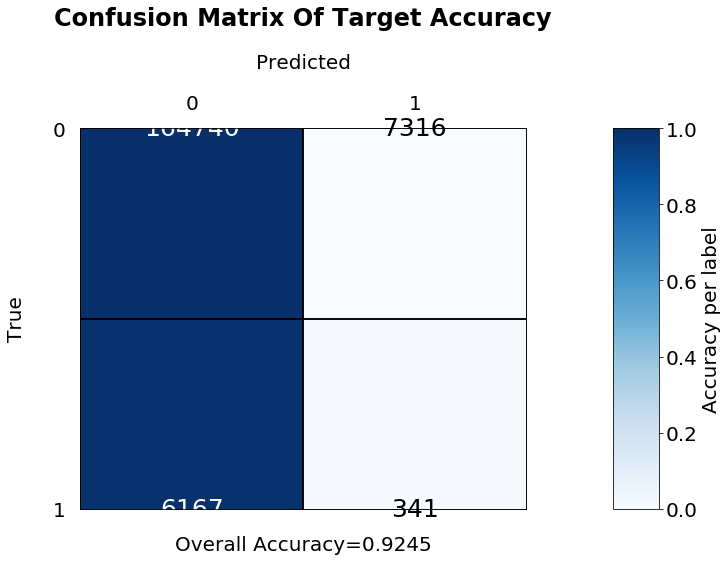

In [53]:
Y_Pred_tree_class_weights = tree_class_weights.predict(X_Test_Shaped)
make_confusion_matrix(Y_Test, Y_Pred_tree_class_weights)

In [54]:
get_gini(Y_Test, Y_Pred_tree_class_weights)

0.009876010123374801


## Random Forest -> Class Weighted

In [55]:
forest = RandomForestClassifier(class_weight=class_weights)

In [56]:
forest.fit(X_Train_Shaped, Y_Train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.5189133716267044,
                                     1: 13.718161464506782},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
K = 5
scores = cross_val_score(forest, 
                         X_Train_Shaped, 
                         Y_Train,scoring='roc_auc', 
                         cv=K)
scores

array([0.56073427, 0.56368775, 0.55912909, 0.57230769, 0.56128611])

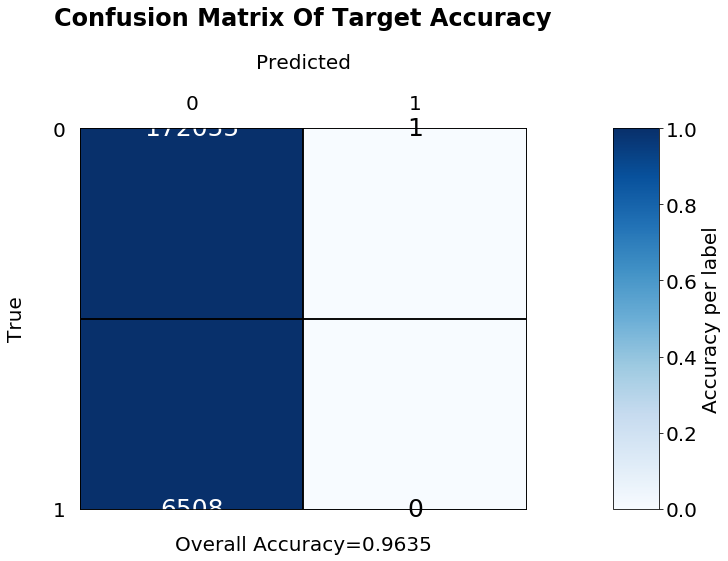

In [58]:
forest_pred = forest.predict(X_Test_Shaped)
make_confusion_matrix(Y_Test, forest_pred)

In [59]:
get_gini(Y_Test, forest_pred)

-5.812061189325313e-06


## Logistic regression

In [60]:
regr = LogisticRegression(class_weight=class_weights, max_iter=500)
regr.fit(X_Train_Shaped, Y_Train)

LogisticRegression(C=1.0,
                   class_weight={0: 0.5189133716267044, 1: 13.718161464506782},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=500, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [61]:
K = 5
scores = cross_val_score(regr, 
                         X_Train_Shaped, 
                         Y_Train, 
                         scoring='roc_auc', 
                         cv=K)
scores

/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

array([0.60536835, 0.61189043, 0.6081237 , 0.60374961, 0.59833797])

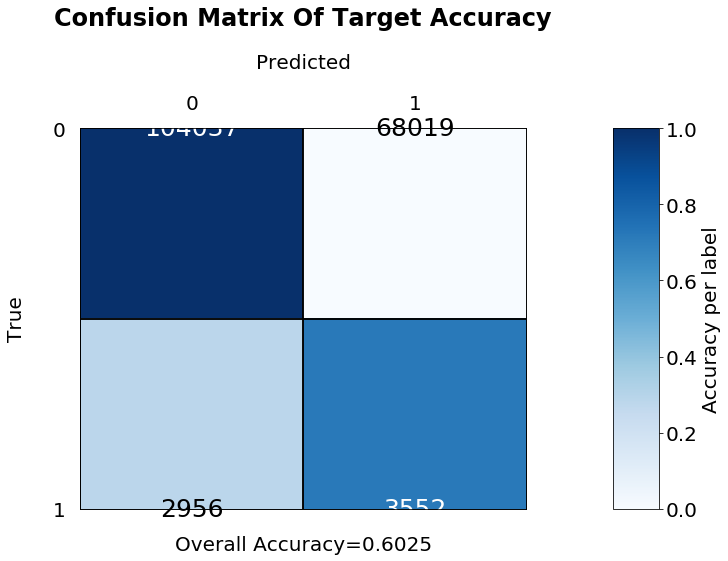

In [62]:
pred_regr = regr.predict(X_Test_Shaped)
make_confusion_matrix(Y_Test, pred_regr)

In [63]:
get_gini(Y_Test, pred_regr)

0.15045920713225858


# Now oversampling/Undersampling the data

In [64]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=7)
over_x, over_y = sm.fit_sample(X_Train_Shaped, Y_Train)


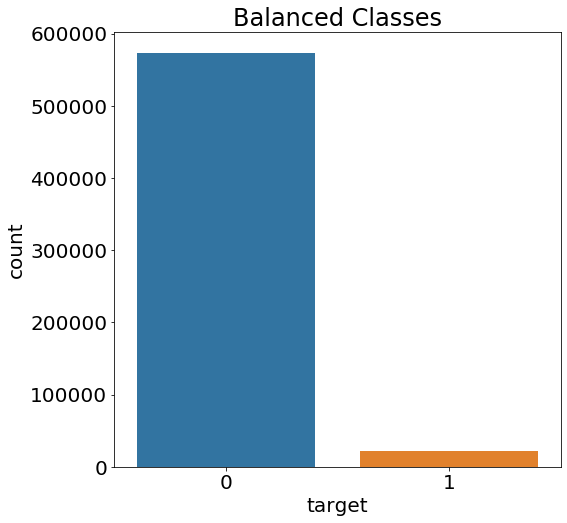

In [65]:
plt.figure(figsize=(8, 8))
sns.countplot('target', data=input_data)
plt.title('Balanced Classes')
plt.show()

In [67]:
over_y = pd.DataFrame(over_y)
over_y.columns = ["target"]

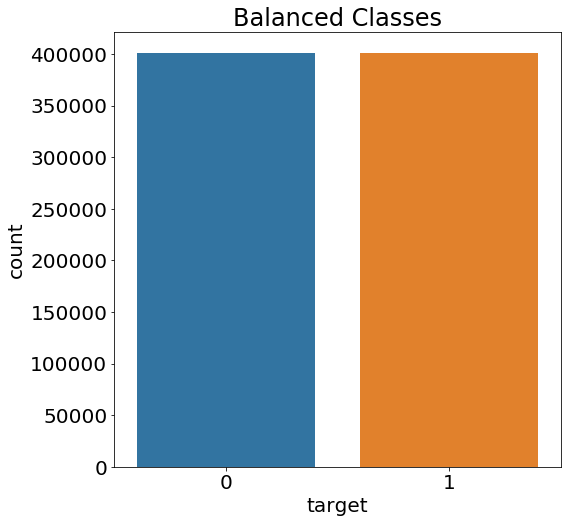

In [69]:
plt.figure(figsize=(8, 8))
sns.countplot('target', data=over_y)
plt.title('Balanced Classes')
plt.show()

## Undersampling

In [70]:
merged = pd.concat([X_Train_Shaped.reset_index(drop=True), Y_Train.reset_index(drop=True)], axis=1)

In [71]:
merged

,ps_ind_01,ps_ind_03,ps_ind_15,ps_reg_01,ps_reg_02,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_03,...,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104,target
0,1,7,7,0.9,0.3,0.400000,0.970058,0.374672,3.741657,0.2,...,0,0,0,0,0,0,0,0,1,0
1,5,3,7,0.7,0.2,0.447214,0.805033,0.424617,3.000000,0.9,...,0,0,0,0,0,0,0,0,1,0
2,3,7,11,0.2,0.3,0.374166,0.784443,0.390768,3.316625,0.3,...,0,0,0,0,0,0,0,0,0,0
3,2,5,11,0.6,0.2,0.316228,0.757518,0.375500,3.316625,0.0,...,0,0,0,0,0,0,0,0,0,0
4,5,5,6,0.9,0.3,0.435890,0.830289,0.414126,3.162278,0.5,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416643,1,3,8,0.5,0.2,0.316228,0.720637,0.294449,3.464102,0.5,...,0,0,0,0,0,0,0,0,0,0
416644,2,7,5,0.3,0.1,0.547723,1.382229,0.532917,3.000000,0.7,...,0,0,0,0,0,0,0,0,0,0
416645,1,2,8,0.4,0.0,0.374166,0.777193,0.371618,3.464102,0.5,...,0,0,0,0,0,0,0,0,0,0
416646,3,3,7,0.3,0.0,0.374166,0.740533,0.416653,3.162278,0.1,...,0,0,0,0,0,0,0,0,0,0


In [72]:
x_1 = merged[merged["target"] == 1]
x_0 = merged[merged["target"] == 0]

In [73]:
x_0_subsampled = x_0.sample(n=len(x_1),random_state=42)

In [74]:
x_0_subsampled

,ps_ind_01,ps_ind_03,ps_ind_15,ps_reg_01,ps_reg_02,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_03,...,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104,target
210390,6,9,11,0.7,0.8,0.400000,0.867074,0.369865,3.464102,0.0,...,0,0,0,0,0,0,0,0,0,0
133776,2,8,9,0.9,0.6,0.374166,0.726121,0.393700,2.828427,0.9,...,0,0,0,0,0,0,0,0,0,0
403903,0,8,5,0.9,0.2,0.424264,0.740226,0.429535,2.828427,0.4,...,0,0,0,0,0,0,0,0,0,0
293033,2,2,7,0.7,0.9,0.374166,0.705615,0.388716,3.316625,0.7,...,0,0,0,0,0,0,0,0,0,0
181842,2,4,0,0.8,0.3,0.400000,0.761157,0.379473,3.000000,0.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406787,0,1,8,0.4,0.2,0.445870,0.852258,0.348855,3.000000,0.5,...,0,0,0,0,0,0,0,0,0,0
39033,2,4,5,0.9,1.0,0.374166,0.769337,0.384968,3.316625,0.3,...,0,0,0,0,0,1,0,0,0,0
3840,0,4,7,0.2,0.1,0.446990,0.767496,0.344964,2.449490,0.2,...,0,0,0,0,0,0,0,0,1,0
302578,5,3,11,0.9,1.2,0.424264,0.823493,0.393446,3.162278,0.5,...,0,0,0,0,0,0,0,0,1,0


In [75]:
under_x = x_1.append(x_0_subsampled)

In [76]:
under_x

,ps_ind_01,ps_ind_03,ps_ind_15,ps_reg_01,ps_reg_02,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_03,...,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104,target
4,5,5,6,0.9,0.3,0.435890,0.830289,0.414126,3.162278,0.5,...,0,0,0,0,0,0,0,0,1,1
8,5,5,1,0.1,0.2,0.547723,1.769489,0.532917,3.605551,0.5,...,0,0,0,0,0,0,0,0,0,1
56,2,5,0,0.3,0.4,0.424264,0.947089,0.418569,2.828427,0.8,...,0,0,0,0,0,0,0,0,0,1
134,1,3,4,0.4,1.0,0.447214,0.986479,0.427200,3.464102,0.5,...,0,0,0,0,0,0,0,0,0,1
212,7,5,13,0.9,0.8,0.400000,0.606337,0.322490,2.645751,0.8,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406787,0,1,8,0.4,0.2,0.445870,0.852258,0.348855,3.000000,0.5,...,0,0,0,0,0,0,0,0,0,0
39033,2,4,5,0.9,1.0,0.374166,0.769337,0.384968,3.316625,0.3,...,0,0,0,0,0,1,0,0,0,0
3840,0,4,7,0.2,0.1,0.446990,0.767496,0.344964,2.449490,0.2,...,0,0,0,0,0,0,0,0,1,0
302578,5,3,11,0.9,1.2,0.424264,0.823493,0.393446,3.162278,0.5,...,0,0,0,0,0,0,0,0,1,0


In [77]:
under_y = under_x["target"]

In [78]:
under_x = under_x.drop("target", axis=1)

In [79]:
under_x.shape

(30372, 149)

In [80]:
under_y.shape

(30372,)

## Running Logistic Regression on the Over and Under Sampled data

In [81]:
scaler = StandardScaler()
x_train = scaler.fit_transform(over_x)
x_test = scaler.transform(X_Test_Shaped)

NameError: name 'StandardScaler' is not defined

### Oversampling run

/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (stat

[0.87753608 0.95947841 0.96016835 0.96012312 0.96032143]


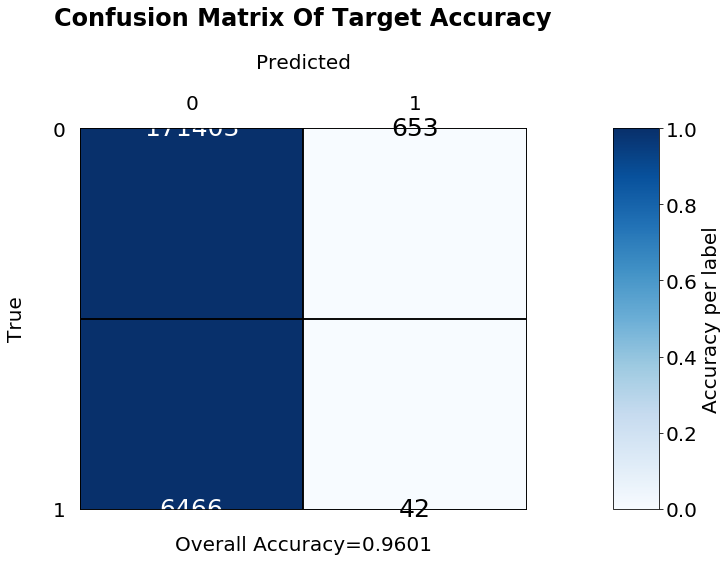

0.002658319618012106


In [82]:
regr = LogisticRegression(max_iter=500)
regr.fit(over_x, np.ravel(over_y))

K = 5
scores = cross_val_score(regr, over_x, over_y, scoring="roc_auc", cv=K)
print(scores)

pred_regr = regr.predict(X_Test_Shaped)
make_confusion_matrix(Y_Test, pred_regr)

get_gini(Y_Test, pred_regr)

### Undersampling Run

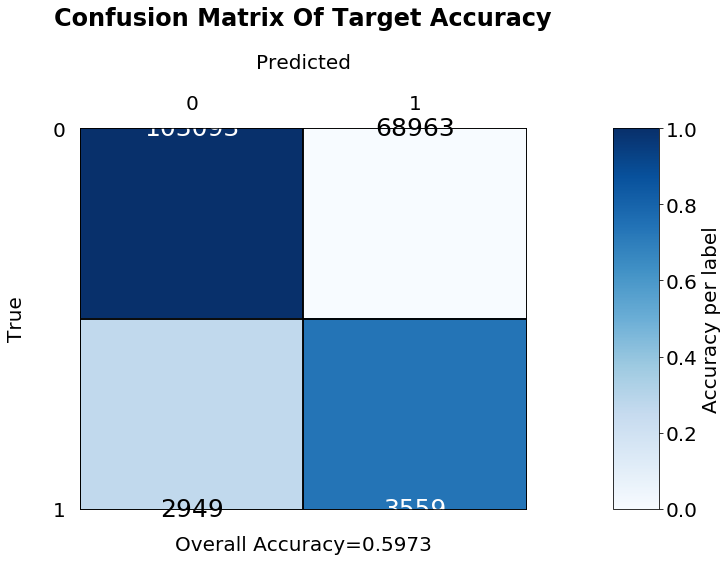

0.1460482206319298


In [83]:
regr = LogisticRegression(max_iter=500)
regr.fit(under_x, under_y)

K = 5
scores = cross_val_score(regr, under_x, under_y, scoring="roc_auc", cv=K)
scores

pred_regr = regr.predict(X_Test_Shaped)
make_confusion_matrix(Y_Test, pred_regr)

get_gini(Y_Test, pred_regr)

## Bagging 

In [84]:
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedBaggingClassifier

In [85]:
bagging_model = BalancedBaggingClassifier()
bagging_model.fit(X_Train_Shaped, Y_Train)

BalancedBaggingClassifier(base_estimator=None, bootstrap=True,
                          bootstrap_features=False, max_features=1.0,
                          max_samples=1.0, n_estimators=10, n_jobs=None,
                          oob_score=False, random_state=None, replacement=False,
                          sampling_strategy='auto', verbose=0,
                          warm_start=False)

In [86]:
scores = cross_val_score(bagging_model, X_Train_Shaped, Y_Train, scoring='roc_auc', cv=5)
scores

array([0.56249599, 0.5597653 , 0.55498336, 0.56122885, 0.55928103])

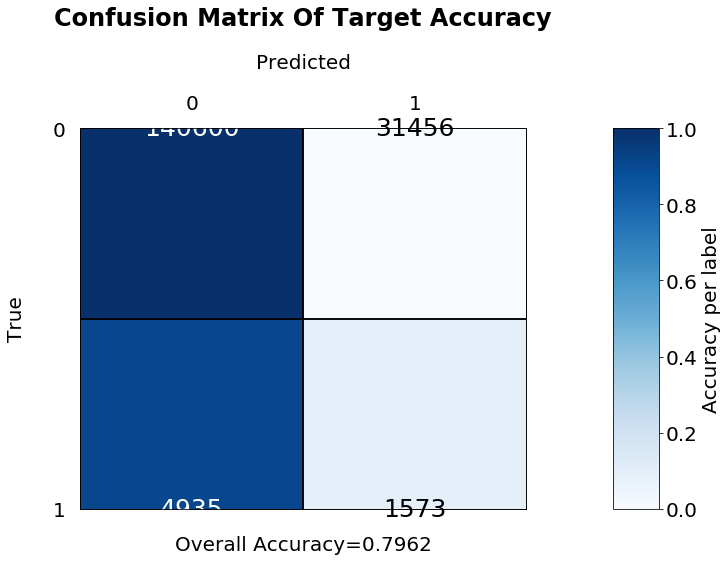

In [87]:
predicted_bagging = bagging_model.predict(X_Test_Shaped)
make_confusion_matrix(Y_Test, predicted_bagging)

In [88]:
get_gini(Y_Test, predicted_bagging)

0.058878323202271154


## Balanced RandomForestClassifier

In [89]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [90]:
balanced_random_forest = BalancedRandomForestClassifier(n_estimators=100)
balanced_random_forest.fit(X_Train_Shaped, Y_Train)

BalancedRandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                               criterion='gini', max_depth=None,
                               max_features='auto', max_leaf_nodes=None,
                               max_samples=None, min_impurity_decrease=0.0,
                               min_samples_leaf=2, min_samples_split=2,
                               min_weight_fraction_leaf=0.0, n_estimators=100,
                               n_jobs=None, oob_score=False, random_state=None,
                               replacement=False, sampling_strategy='auto',
                               verbose=0, warm_start=False)

In [91]:
scores = cross_val_score(balanced_random_forest, X_Train_Shaped, Y_Train, scoring='roc_auc', cv=5)
scores

array([0.61244255, 0.61159717, 0.6141127 , 0.61018161, 0.60460037])

In [92]:
pred_balanced_rf = balanced_random_forest.predict(X_Test_Shaped)

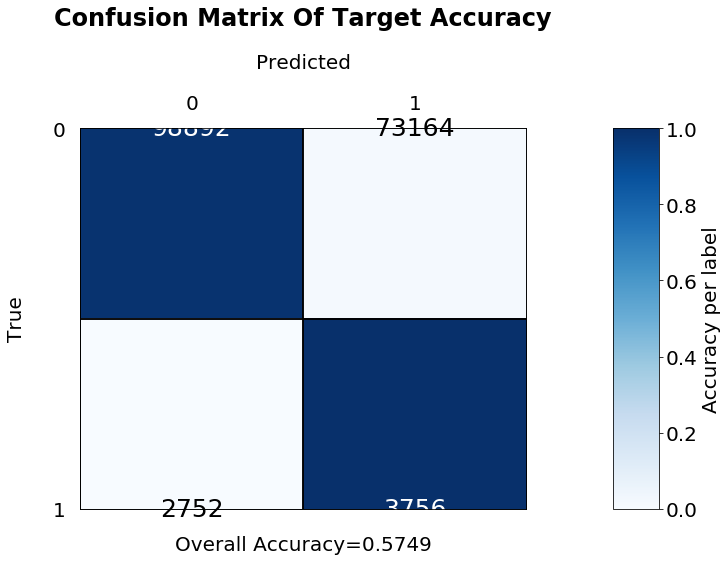

In [93]:
make_confusion_matrix(Y_Test, pred_balanced_rf)

In [94]:
get_gini(Y_Test, pred_balanced_rf)

0.15190218796133026



# NN APPROACH

In [200]:
import tensorflow as tf 
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

In [201]:
np.random.seed(42) 
tf.random.set_seed(42)

Cross entropy loss
https://www.tensorflow.org/tutorials/structured_data/imbalanced_data


In [202]:
def make_model(train_x):
    dropout_threshold = 0.5
    model = keras.models.Sequential([
        keras.layers.Dense(512, activation="relu", 
                           input_shape=train_x.shape[1:]),
        keras.layers.Dropout(dropout_threshold),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(512, activation="relu"), 
        keras.layers.Dropout(dropout_threshold),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(1, activation="sigmoid")
    ]) 
    return model

In [203]:
def compile_and_run(model, x_train, y_train, 
                    x_valid, y_valid, class_weights):
    model.compile(loss="binary_crossentropy", 
                  optimizer="sgd", 
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    
    early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, 
                                                      restore_best_weights=True)
    
    history = model.fit(x_train, y_train, epochs=30, 
                        verbose=0, 
                        validation_data=(x_valid,y_valid), 
                        callbacks=[early_stopping_cb],
                        class_weight=class_weights)
    return history


In [204]:
def plot_roc_curve(Y_Test, pred):
    
    y_pred_keras = pred.ravel()
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_Test, 
                                                       y_pred_keras)
    auc_keras = auc(fpr_keras, tpr_keras)
    print("GINI " + str(2*auc_keras -1))
    
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

In [205]:
def plot_history(history):
    pd.DataFrame(history.history).plot(figsize=(12,8)) 
    plt.xlabel("epoch") 
    plt.grid(True) 
    plt.gca().set_ylim(0,1) 
    plt.show()

# Initial Run

The data is imbalanced, and thus a bias will need to be added to the final layer, as described in 
https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

In [228]:
x_train, x_valid, \
y_train, y_valid = train_test_split(X_Train_Shaped, 
                                    Y_Train, 
                                    random_state=42, 
                                    test_size=0.20,
                                    stratify=Y_Train)

In [229]:
scaler = StandardScaler() 
x_train = scaler.fit_transform(x_train) 
x_valid = scaler.transform(x_valid) 
x_test = scaler.transform(X_Test_Shaped)

In [230]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

print(class_weights)

[ 0.51891372 13.71791917]


In [231]:
class_weights = dict(enumerate(class_weights))

In [232]:
basic_model = make_model(x_train)
basic_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 512)               76800     
_________________________________________________________________
dropout_28 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 512)               2048      
_________________________________________________________________
dense_43 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_29 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_29 (Batc (None, 512)               2048      
_________________________________________________________________
dense_44 (Dense)             (None, 1)               

In [233]:
history = compile_and_run(basic_model, x_train, y_train, 
                           x_valid, y_valid, class_weights)

  ...
    to  
  ['...']
  ...
    to  
  ['...']


In [234]:
basic_model.evaluate(x_test, Y_Test)

178564/178564 [==============================] - 7s 37us/sample - loss: 0.6765 - accuracy: 0.5545 - auc: 0.5960


[0.6765402466594814, 0.55447346, 0.5960141]

In [235]:
pred = basic_model.predict(x_test)

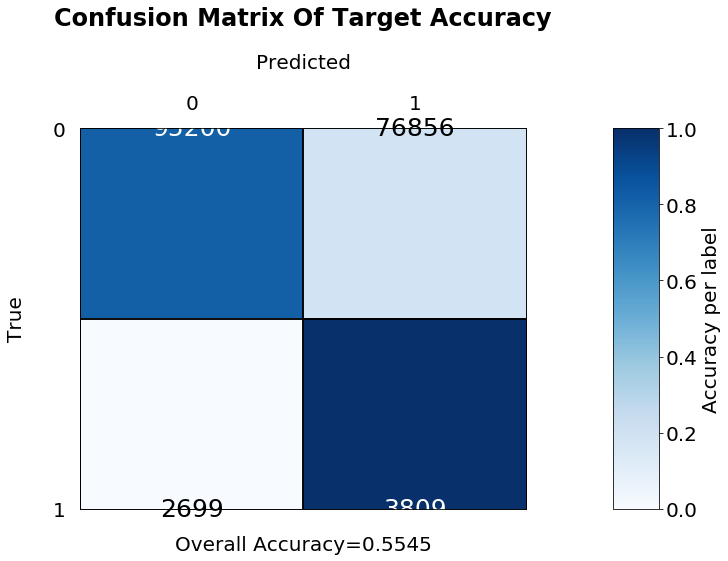

In [236]:
make_confusion_matrix(Y_Test, basic_model.predict_classes(x_test))

GINI 0.1921755290561764


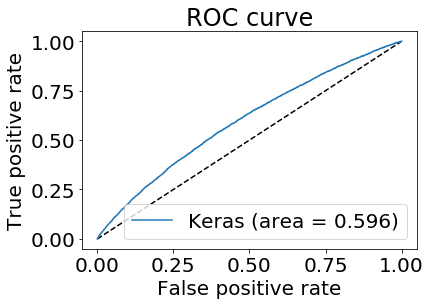

In [237]:
plot_roc_curve(Y_Test, pred)

# Oversampled Data 


In [238]:
x_train_over, x_valid_over, \
y_train_over, y_valid_over  = train_test_split(over_x, 
                                               over_y, 
                                               random_state=42, 
                                               test_size=0.20,
                                               stratify=over_y)

In [239]:
over_sampled_scaler = StandardScaler() 
x_train_over = over_sampled_scaler.fit_transform(x_train_over) 
x_valid_over = over_sampled_scaler.transform(x_valid_over) 
x_test_over = over_sampled_scaler.transform(X_Test_Shaped)

In [240]:
class_weights = {0:1, 1:1}

oversampled_model = make_model(x_train_over)
oversampled_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 512)               76800     
_________________________________________________________________
dropout_30 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 512)               2048      
_________________________________________________________________
dense_46 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_31 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 512)               2048      
_________________________________________________________________
dense_47 (Dense)             (None, 1)               

In [241]:
oversampled_history = compile_and_run(oversampled_model, 
                                      x_train_over, 
                                      y_train_over, 
                                      x_valid_over, 
                                      y_valid_over, 
                                      class_weights)

  ...
    to  
  ['...']
  ...
    to  
  ['...']


In [242]:
oversampled_model.evaluate(x_test_over, Y_Test)

178564/178564 [==============================] - 6s 35us/sample - loss: 0.2232 - accuracy: 0.9528 - auc: 0.5283


[0.22322678364831186, 0.95282924, 0.5282898]

In [243]:
pred_over = oversampled_model.predict(x_test_over)

In [244]:
over_class_predictions = [int(i) for i in list(tf.greater(pred_over, 0.5))]

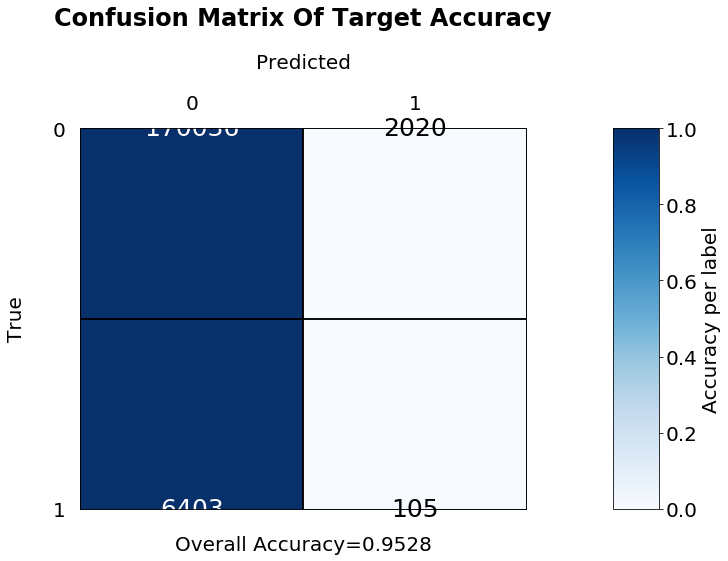

In [245]:
make_confusion_matrix(Y_Test, over_class_predictions)

GINI 0.056681570370493706


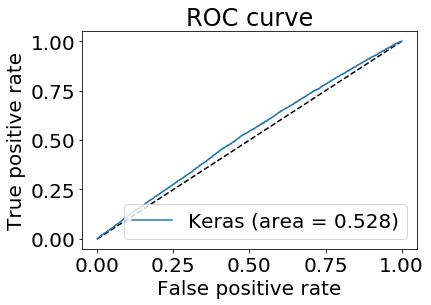

In [246]:
plot_roc_curve(Y_Test, pred_over)

# Undersampling

In [247]:
x_train_under, x_valid_under, \
y_train_under, y_valid_under = train_test_split(under_x, 
                                    under_y, 
                                    random_state=42, 
                                    test_size=0.20,
                                    stratify=under_y)

In [248]:
under_sampled_scaler = StandardScaler() 
x_train_under = under_sampled_scaler.fit_transform(x_train_under) 
x_valid_under = under_sampled_scaler.transform(x_valid_under) 
x_test_under = under_sampled_scaler.transform(X_Test_Shaped)

In [249]:
class_weights = {0:1, 1:1}

undersampled_model = make_model(x_train_under)
undersampled_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 512)               76800     
_________________________________________________________________
dropout_32 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 512)               2048      
_________________________________________________________________
dense_49 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_33 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 512)               2048      
_________________________________________________________________
dense_50 (Dense)             (None, 1)               

In [250]:
undersampled_history = compile_and_run(undersampled_model, 
                                       x_train_under, 
                                       y_train_under, 
                                       x_valid_under, 
                                       y_valid_under, 
                                       class_weights)

  ...
    to  
  ['...']
  ...
    to  
  ['...']


In [251]:
undersampled_model.evaluate(x_test_under, Y_Test)

178564/178564 [==============================] - 6s 34us/sample - loss: 0.6703 - accuracy: 0.6223 - auc: 0.5937


[0.6702910067720499, 0.62225866, 0.59372073]

In [252]:
pred_under = undersampled_model.predict(x_test_under)

In [253]:
class_predictions_under = [int(i) for i in list(tf.greater(pred_under, 0.5))]

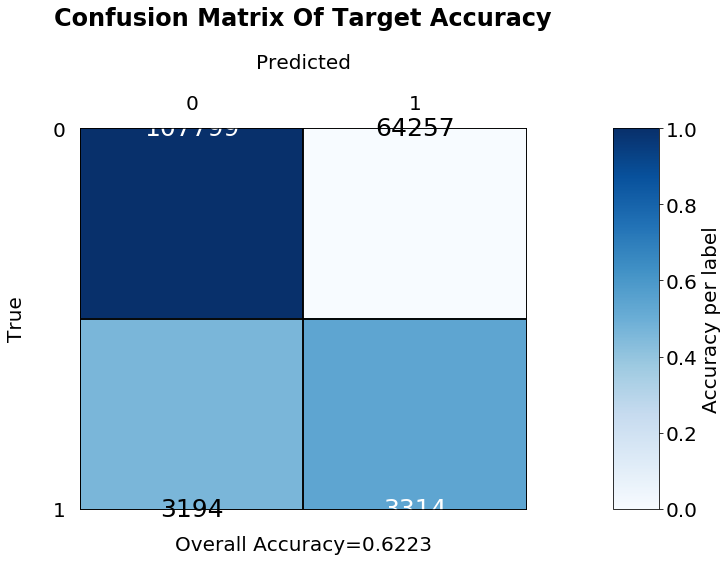

In [254]:
make_confusion_matrix(Y_Test, class_predictions_under)

GINI 0.18786019686590794


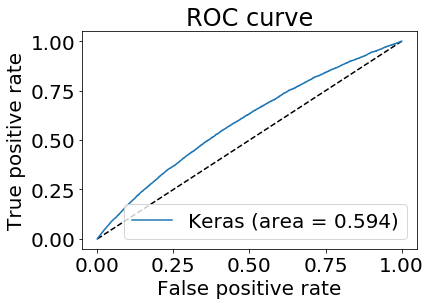

In [255]:
plot_roc_curve(Y_Test, pred_under)

# Hyperparameter Tuning

In [256]:
from tensorflow.keras import optimizers


In [257]:
def make_tuned_model(train_x, dropout_threshold, neurons):
    model = keras.models.Sequential([
        keras.layers.Dense(neurons, activation="relu", 
                           input_shape=train_x.shape[1:]),
        keras.layers.Dropout(dropout_threshold),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(neurons, activation="relu"), 
        keras.layers.Dropout(dropout_threshold),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(1, activation="sigmoid")
    ]) 
    return model

In [258]:
def compile_and_run_tuned(model, x_train, y_train, 
                    x_valid, y_valid, class_weights, 
                    lr, verbose, epochs):
    opt = optimizers.SGD(lr=lr)
    model.compile(loss="binary_crossentropy", 
                  optimizer=opt, 
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]) 
    early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, 
                                                      restore_best_weights=True)
    history = model.fit(x_train, y_train, epochs=epochs, 
                        verbose=verbose, 
                        validation_data=(x_valid,y_valid), 
                        callbacks=[early_stopping_cb],
                        class_weight=class_weights)
    return history

In [259]:
def get_gini_keras(Y_Test, pred):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_Test, pred.ravel())
    auc_keras = auc(fpr_keras, tpr_keras)
    return (2 * auc_keras - 1)

In [260]:
params = {
    "dropout":[0,0.2,0.5],
    "neurons":[256, 512],
    "lr":[1, 0.1, 0.01, 0.001],
}

In [261]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.5189137183227522, 1: 13.717919170302082}

In [262]:
x_train, x_valid, y_train, y_valid = train_test_split(X_Train_Shaped, Y_Train, random_state=42, test_size=0.20,stratify=Y_Train)

scaler = StandardScaler() 
x_train = scaler.fit_transform(x_train) 
x_valid = scaler.transform(x_valid) 
x_test = scaler.transform(X_Test_Shaped)

In [263]:
combination = []
best_model = None
best_gini = 0
for dropout in params["dropout"]:
    for neurons in params["neurons"]:
        for learning_rate in params["lr"]:
            model = make_tuned_model(x_train, dropout, neurons)
            history = compile_and_run_tuned(model,
                                            x_train, 
                                            y_train, 
                                            x_valid, 
                                            y_valid, 
                                            class_weights,
                                            learning_rate, 
                                            verbose=0, 
                                            epochs=30)
            
            training_auc = history.history["auc"][-1]
            prediction = model.predict(x_test)
            gini_metric = get_gini_keras(Y_Test, prediction)
            
            if gini_metric > best_gini:
                best_model = model
            
            thing = history
            combination.append(({
                                    "dropout":dropout,
                                    "neurons":neurons,
                                    "lr":learning_rate,
                                },
                                training_auc,
                                gini_metric, 
                                history))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']


In [264]:
combination

[({'dropout': 0, 'neurons': 256, 'lr': 1},
  0.54878545,
  0.20798517586461251,
  <tensorflow.python.keras.callbacks.History at 0x212adc290>),
 ({'dropout': 0, 'neurons': 256, 'lr': 0.1},
  0.6201801,
  0.21069878954662902,
  <tensorflow.python.keras.callbacks.History at 0x20b99bc90>),
 ({'dropout': 0, 'neurons': 256, 'lr': 0.01},
  0.62826943,
  0.18206160754853795,
  <tensorflow.python.keras.callbacks.History at 0x20bf14c90>),
 ({'dropout': 0, 'neurons': 256, 'lr': 0.001},
  0.62594986,
  0.1871835489861664,
  <tensorflow.python.keras.callbacks.History at 0x214c2cd90>),
 ({'dropout': 0, 'neurons': 512, 'lr': 1},
  0.5590878,
  0.20985620231877178,
  <tensorflow.python.keras.callbacks.History at 0x2127ada50>),
 ({'dropout': 0, 'neurons': 512, 'lr': 0.1},
  0.6208578,
  0.20516030336344504,
  <tensorflow.python.keras.callbacks.History at 0x2160a4f10>),
 ({'dropout': 0, 'neurons': 512, 'lr': 0.01},
  0.64381087,
  0.14770605928848246,
  <tensorflow.python.keras.callbacks.History at 0x21

In [269]:
sortedlist = sorted(combination, key=lambda x: x[2], reverse=True)

In [270]:
sortedlist

[({'dropout': 0.5, 'neurons': 512, 'lr': 0.1},
  0.60512733,
  0.21074131815232966,
  <tensorflow.python.keras.callbacks.History at 0x242e33ad0>),
 ({'dropout': 0, 'neurons': 256, 'lr': 0.1},
  0.6201801,
  0.21069878954662902,
  <tensorflow.python.keras.callbacks.History at 0x20b99bc90>),
 ({'dropout': 0, 'neurons': 512, 'lr': 1},
  0.5590878,
  0.20985620231877178,
  <tensorflow.python.keras.callbacks.History at 0x2127ada50>),
 ({'dropout': 0.2, 'neurons': 512, 'lr': 0.1},
  0.6158447,
  0.20926037941964215,
  <tensorflow.python.keras.callbacks.History at 0x21cc6b3d0>),
 ({'dropout': 0, 'neurons': 256, 'lr': 1},
  0.54878545,
  0.20798517586461251,
  <tensorflow.python.keras.callbacks.History at 0x212adc290>),
 ({'dropout': 0.5, 'neurons': 256, 'lr': 0.001},
  0.5887207,
  0.20765449208815223,
  <tensorflow.python.keras.callbacks.History at 0x26e0c7ed0>),
 ({'dropout': 0.5, 'neurons': 256, 'lr': 0.1},
  0.59860104,
  0.20731920903155587,
  <tensorflow.python.keras.callbacks.History a

In [272]:
print("GINI " + str(sortedlist[0][2]))

GINI 0.21074131815232966


In [278]:
best_model

# Load in the prediction data

In [420]:
Test_Set = pd.read_csv("test.csv")

In [421]:
test_id = Test_Set["id"]

In [422]:
Test_Set.drop("id", axis=1)

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,1,8,1,0,0,1,0,0,0,...,1,1,1,12,0,1,1,0,0,1
1,4,2,5,1,0,0,0,0,1,0,...,2,0,3,10,0,0,1,1,0,1
2,5,1,3,0,0,0,0,0,1,0,...,4,0,2,4,0,0,0,0,0,0
3,0,1,6,0,0,1,0,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,5,1,7,0,0,0,0,0,1,0,...,4,0,0,4,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892811,0,1,6,0,0,0,1,0,0,0,...,4,2,3,4,0,1,0,0,1,0
892812,5,3,5,1,0,0,0,1,0,0,...,6,2,2,11,0,0,1,1,0,0
892813,0,1,5,0,0,1,0,0,0,0,...,5,2,2,11,0,1,1,0,0,0
892814,6,1,5,1,0,0,0,0,1,0,...,1,1,2,7,1,1,0,0,0,0


In [423]:
Test_Set_filtered = Test_Set[submission_test_columns]

In [428]:
Test_Set_filtered.shape

(892816, 14)

In [425]:
list_of_cols

['ps_car_01_cat', 'ps_car_06_cat', 'ps_car_09_cat', 'ps_car_11_cat']

In [430]:
minus_list = []
for col in Test_Set_filtered.columns:       
    total = Test_Set_filtered[Test_Set_filtered[col] == -1].count()
    if total[0] > 0: 
        minus_list.append(col)

In [431]:
minus_list

['ps_car_01_cat', 'ps_car_09_cat', 'ps_car_14']

In [432]:
for col in minus_list:
    Test_Set_filtered[col] = imputer_list[col]\
                                .transform(Test_Set_filtered[[col]])

/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/ipykernel_l

In [433]:
minus_list = []
for col in Test_Set_filtered.columns:       
    total = Test_Set_filtered[Test_Set_filtered[col] == -1].count()
    if total[0] > 0: 
        minus_list.append(col)

In [435]:
Test_Set_Final = pd.get_dummies(Test_Set_filtered, 
                               columns=list_of_cols) 

In [436]:
Test_Set_Final.shape

(892816, 149)

In [437]:
scaled_test = scaler.transform(Test_Set_Final)

In [438]:
probabilities = best_model.predict_proba(scaled_test)

In [442]:
output_list = [i[0] for i in probabilities]

In [444]:
output_dataframe = pd.DataFrame(data={"id": test_id, "target": output_list})

In [446]:
output_dataframe.to_csv("output.csv", index=False)